In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
os.chdir('D:/multiple_factors_models/')
from single_factors_test import Clean_Data
# 解决X轴名称不能显示中文的问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [66]:
add_winddata = 'C:/Users/wuwangchuxin/Desktop/TF_SummerIntern/MF_data/wind/'
add_ready = 'C:/Users/wuwangchuxin/Desktop/TF_SummerIntern/MF_data/prepared_data/'

In [67]:
pe = np.load(add_ready+'windfactors_pe.npy')
pb = np.load(add_ready+'windfactors_pb.npy')
ps = np.load(add_ready+'windfactors_ps.npy')

In [68]:
industry_sw1 = np.load(add_ready+'industry_sw1.npy')
industry_sw1_name = np.load(add_ready+'industry_sw1_name.npy').reshape(1,-1)
industry = pd.read_excel(add_winddata+'industry_sw1_class.xlsx')
#industry_dict = {'交通运输':'JTYS','休闲服务':'XXFW','传媒':'CM','公用事业':'GYSY',
#                 '农林牧渔':'NLMY','化工':'HG','医药生物':'YYSW','商业贸易':'SYMY',
#                 '国防军工':'GFJG','家用电器':'JYDQ','建筑材料':'JZCL','建筑装饰':'JZZS',
#                 '房地产':'FDC','有色金属':'YSJS','机械设备':'JXSB','汽车':'QC',
#                 '电子':'DZ','电气设备':'DQSB','纺织服装':'FZFZ','综合':'ZH',
#                 '计算机':'JSJ','轻工制造':'QGZZ','通信':'TX','采掘':'CJ','钢铁':'GT',
#                 '银行':'YH','非银金融':'FYJR','食品饮料':'SPYL'}
# 名称替换为英文形式
#for i in np.arange(len(industry.industry_1class)):
#    industry.loc[i,'industry_1class'] = industry_dict[industry.loc[i,'industry_1class']]

In [69]:
stockcode = np.load(add_ready+'stockscode.npy').reshape(-1,1)
trade_date = np.load(add_ready+'month_end_tdate.npy').reshape(1,-1)
pe = Clean_Data(pe).Median_deextremum()
pe_df = pd.DataFrame(pe,columns=trade_date[0,:],index=stockcode[:,0])
pe_mean_industry = pe_df.groupby(np.array(industry.industry_1class)).mean()

pb = Clean_Data(pb).Median_deextremum()
pb_df = pd.DataFrame(pb,columns=trade_date[0,:],index=stockcode[:,0])
pb_mean_industry = pb_df.groupby(np.array(industry.industry_1class)).mean()

ps = Clean_Data(ps).Median_deextremum()
ps_df = pd.DataFrame(ps,columns=trade_date[0,:],index=stockcode[:,0])
ps_mean_industry = ps_df.groupby(np.array(industry.industry_1class)).mean()

D:\multiple_factors_models\single_factors_test.py:36: RuntimeWarning: invalid value encountered in greater
  res = np.where(self.arr>n*mad,n*mad,np.where(self.arr<(-n)*mad,(-n)*mad,self.arr))
D:\multiple_factors_models\single_factors_test.py:36: RuntimeWarning: invalid value encountered in less
  res = np.where(self.arr>n*mad,n*mad,np.where(self.arr<(-n)*mad,(-n)*mad,self.arr))


In [71]:
pe_pb_ps = pd.DataFrame([pe_mean_industry['2018-07-31'],pb_mean_industry['2018-07-31'],
                         ps_mean_industry['2018-07-31']]).T
pe_pb_ps.columns=['PE','PB','PS']
pe_pb_ps.sort_values(by='PE',ascending=False,inplace=True)

In [72]:
x = list(range(len(pe_pb_ps.index)))
x_ticks = np.array(pe_pb_ps.index)
y1 = pe_pb_ps['PE']
y2 = pe_pb_ps['PB']
y3 = pe_pb_ps['PS']

In [53]:
pe_pb_ps = pd.DataFrame([pe_mean_industry['2018-07-31'],pb_mean_industry['2018-07-31'],
                         ps_mean_industry['2018-07-31']]).T
pe_pb_ps.columns=['PE','PB','PS']
pe_pb_ps.sort_values(by='PE',ascending=False,inplace=True)

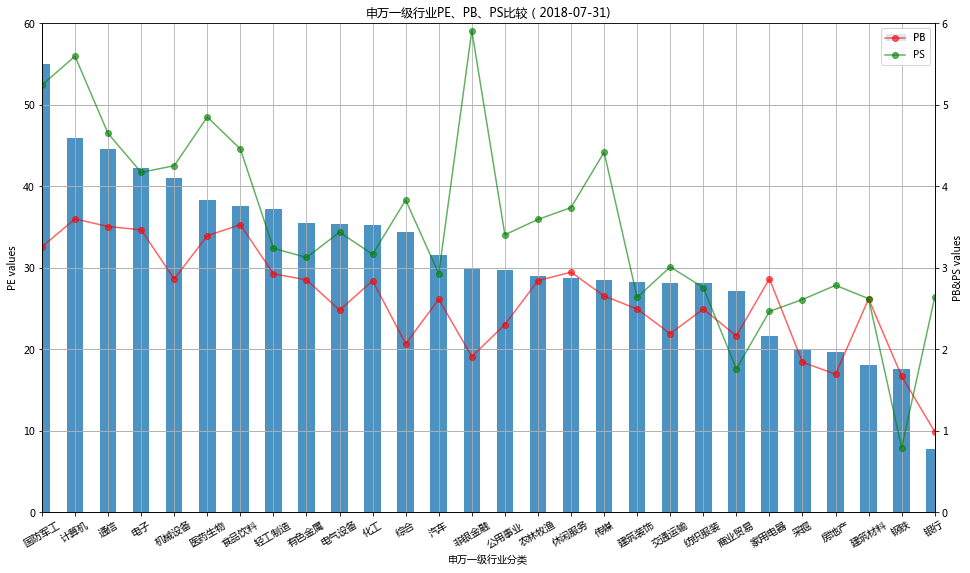

In [76]:
ax1 = plt.figure(figsize=(16, 9)).add_subplot(1,1,1)
#fig,ax1 = plt.subplots(figsize=(16, 9))
y1.plot(label='PE',ax=ax1,style='bo-',alpha=0.8,kind='bar',rot=30,
       grid=True)

ax1.set_ylim([0,60])
ax1.set_ylabel('PE values')
ax1.set_xlabel('申万一级行业分类')
plt.legend(loc='best')
ax2 = ax1.twinx()
y2.plot(label='PB',ax=ax2,style='ro-',alpha=0.61,kind='line',rot=30,
       grid=True)
y3.plot(label='PS',ax=ax2,style='go-',alpha=0.61,kind='line',rot=30,
       grid=True)

ax2.set_ylabel('PB&PS values')
ax2.set_ylim([0,6])

plt.title("申万一级行业PE、PB、PS比较（2018-07-31)")
plt.legend(loc='best')

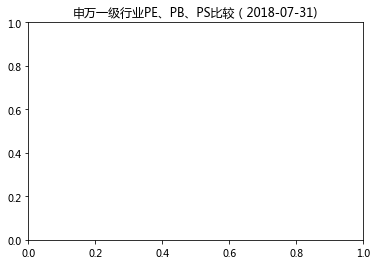

In [75]:
ax2 = ax1.twinx()
y2.plot(label='PB',ax=ax2,style='ro-',alpha=0.61,kind='line',rot=30,
       grid=True)
y3.plot(label='PS',ax=ax2,style='go-',alpha=0.61,kind='line',rot=30,
       grid=True)

ax2.set_ylabel('PB&PS values')
ax2.set_ylim([0,6])

plt.title("申万一级行业PE、PB、PS比较（2018-07-31)")
plt.legend(loc='best')

In [56]:
y1

国防军工    55.048939
计算机     45.961959
通信      44.570307
电子      42.228813
机械设备    40.986127
医药生物    38.331263
食品饮料    37.578613
轻工制造    37.260883
有色金属    35.444076
电气设备    35.337107
化工      35.231855
综合      34.411804
汽车      31.520546
非银金融    29.925707
公用事业    29.779690
农林牧渔    29.041016
休闲服务    28.700796
传媒      28.464136
建筑装饰    28.230981
交通运输    28.164041
纺织服装    28.076120
商业贸易    27.201830
家用电器    21.658184
采掘      20.051814
房地产     19.622659
建筑材料    18.097374
钢铁      17.603354
银行       7.730020
Name: PE, dtype: float64

Text(0.5,1,'申万一级行业PE、PB、PS比较（2018-07-31)')

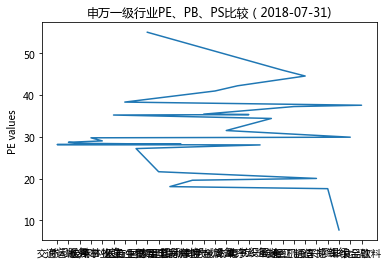

In [64]:
ax = plt.figure().add_subplot(1,1,1)
ax.plot(x, y1)
ax.set_ylabel('PE values')
ax.set_title("申万一级行业PE、PB、PS比较（2018-07-31)")